In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Einsteinova Nobelova cena - fotoelektrický jev

Einstein proslavil hlavně svou speciální (1905) a obecnou (1915) teorií relativity. Přece téměř kažý (i nefyzik!) zná jeho slavnou rovnici $E = mc^2$. Mnozí si dokonze milně myslí, že Nobelovu cenu, kterou získal v roce 1921 získal právě díky své práci na těchto teoriích zabívajících se časoporostorem. Jenže tomu tak není! Nobelovu cenu totiž dostal za "vysvětlení fotoelektrického jevu a za zásluhy o teoretickou fyziku". A co je to ten fotoelektrický děj, za který dostal Albert Einstein Novu cenu? Na to se podíváme v tomto cvičení.

https://cs.wikipedia.org/wiki/Fotoelektrick%C3%BD_jev \
https://cs.wikipedia.org/wiki/Albert_Einstein \
https://en.wikipedia.org/wiki/Photoelectric_effect

Na začátku 20. století již fyzici věděli, že pokud posvítí elektromagentickým zářením (např. ultrafialovým) na určité materiály (zejména kovy), tak se z nich uvolní elektrony. Čím menší je frekvence záření tím větší kinetickou energii uvolněné elektrony mají. V roce 1905 Einstein přišel s teoretickým vystvětlením tohoto jevu. V jeho teorii je elektromagentické záření tvořeno částicemi (fotony), kde každá částice má energii přímo uměrnou frekvenci tohoto záření podle vztahu

\begin{equation*}
    E_f = hf,
\end{equation*}

kde konstanta úměrnosti $h = 6.62607015 \cdot 10^{-34} \text{ J}\cdot\text{Hz}^{-1}$ je Planckova konstanta.

Einesten navrhl, že energie nejrychlejších elektronů $E$, které materiál opouštějí se řídí podle vztahu

\begin{equation*}
    E = E_f - W = hf - W,
\end{equation*}

kde $W$ je tzv. výstupní práce materiálu - minimální energie potřebná k uvolnění elektronu z materiálu. Toto teoretické vysvětlení souhlasilo s experimentem a zároveň položilo základ kvantové fyziky. Proto není překvapivé, že právě za objasnění fotoelektrického jevu dostal Albert Einstein Nobelovu cenu.

In [3]:
data = pd.read_table("data.txt", header = None)
data = data.rename(columns={0: "Prvok", 1: "W [eV]"})

Popis načtených dat:
- Prvok - značka chemického prvku,
- W [eV] $W$ - Výstupní práce daného materiálu

Výstupní práce i energie elektronů se často udává v elektronvoltech - $1 \text{ eV} = 1.602 \cdot 10^{-19} \text{ J}$, takže i při této úloze si budeme muset dávat pozor na jednotky!

Sestrojíme grafy závslosti kinteciké energie elektronů $E$ na frekvenci $f$ fotonů.

In [4]:
#Načteme si výstupní práce několika kovů

W_Cu = float(data[data["Prvok"] == "Cu"]["W [eV]"].values[0])
W_Au = float(data[data["Prvok"] == "Au"]["W [eV]"].values[0])
W_Si = float(data[data["Prvok"] == "Si"]["W [eV]"].values[0])
W_K = float(data[data["Prvok"] == "K"]["W [eV]"].values[0])
W_Ag = float(data[data["Prvok"] == "Ag"]["W [eV]"].values[0])

In [5]:
h = 6.62607015e-34              # Planckova konstanta [J.s]

def photo_eff(f, W):
    return(h*f/1.602e-19 - W)   # Prevedli jsme energii fotonu na elektronvolty

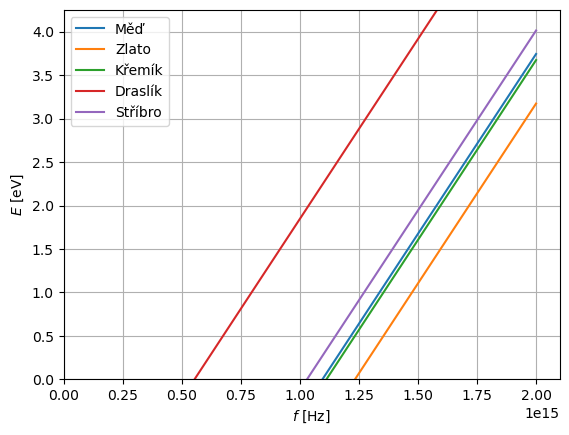

In [6]:
f = np.linspace(0, 2e15, 1000)                                      # Rozsah frekvenci [Hz]


plt.plot(f, photo_eff(f, W_Cu), label = "Měď", zorder = 2)
plt.plot(f, photo_eff(f, W_Au), label = "Zlato", zorder = 2)
plt.plot(f, photo_eff(f, W_Si), label = "Křemík", zorder = 2)
plt.plot(f, photo_eff(f, W_K), label = "Draslík", zorder = 2)
plt.plot(f, photo_eff(f, W_Ag), label = "Stříbro", zorder = 2)


plt.grid()

plt.ylabel("$E$ [eV]")
plt.xlabel("$f$ [Hz]")

plt.ylim(0,4.25)
plt.xlim(0)

plt.legend()